In [4]:
import pandas as pd
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt

In [7]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header= None)
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header = None)

In [8]:
df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [12]:
X = df_train.iloc[0, 1:].values.reshape(28, 28)

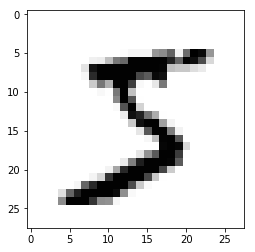

In [14]:
plt.imshow(X, cmap="Greys")

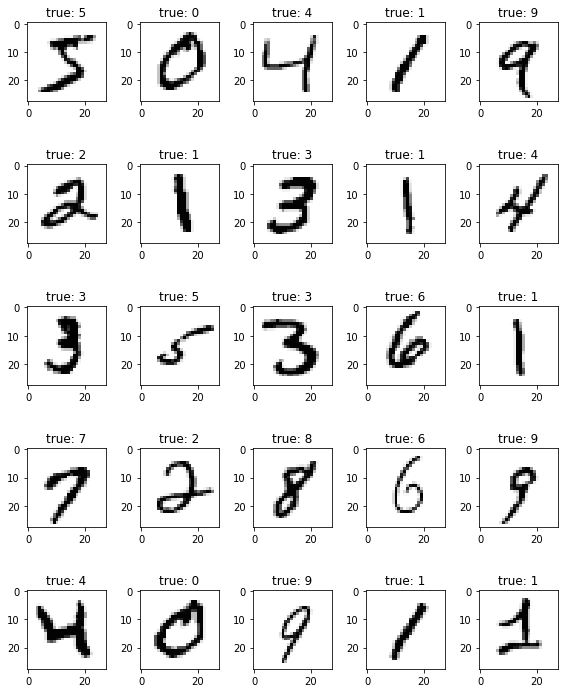

In [20]:
fig, _ = plt.subplots(5, 5, figsize = (8, 10))

for i, ax in enumerate(fig.axes):
    X = df_train.iloc[i, 1:].values.reshape(28, 28)
    label = df_train.iloc[i, 0]
    ax.imshow(X, cmap="Greys")
    ax.set_title("true: " + str(label))
    
plt.tight_layout()

In [25]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(df_train.iloc[:, 1:])
X_test = scaler.transform(df_test.iloc[:, 1:])
y_train = df_train.iloc[:, 0]
y_test = df_test.iloc[:, 0]

In [26]:
%%time
est = linear_model.SGDClassifier(n_jobs=4, tol=1e-5, eta0 = 0.15,  
                        learning_rate = "invscaling", 
                        alpha = 0.01, max_iter= 100)
est.fit(X_train, y_train)
print("accuracy", est.score(X_test, y_test), "iterations:", est.n_iter_)

accuracy 0.9186 iterations: 18
CPU times: user 11.2 s, sys: 203 ms, total: 11.4 s
Wall time: 4.13 s


In [27]:
X_train.shape

(60000, 784)

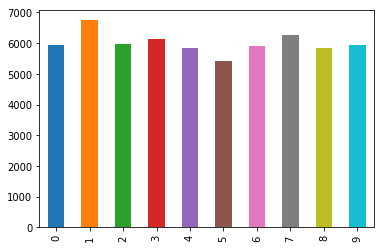

In [30]:
pd.Series(y_train).value_counts().sort_index().plot.bar()

In [33]:
%%time 
pca = decomposition.PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train)

CPU times: user 14.6 s, sys: 806 ms, total: 15.4 s
Wall time: 8.42 s


In [42]:
ratios = pd.DataFrame({"explained": pca.explained_variance_ratio_})
ratios["cum"] = np.cumsum(pca.explained_variance_ratio_) 
ratios.sort_values("cum", ascending=False)

,explained,cum
783,9.155068e-36,1.000000
728,2.391105e-34,1.000000
730,2.391105e-34,1.000000
731,2.391105e-34,1.000000
732,2.391105e-34,1.000000
733,2.391105e-34,1.000000
734,2.391105e-34,1.000000
735,2.391105e-34,1.000000
737,2.391105e-34,1.000000
738,2.391105e-34,1.000000


Text(0,0.5,'Explained variance ratio')

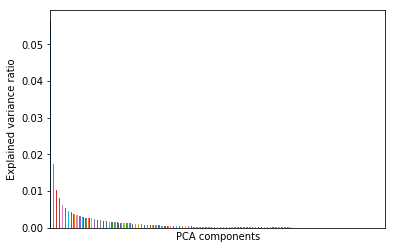

In [48]:
ratios.explained.plot.bar()
plt.xticks([]);
plt.xlabel("PCA components")
plt.ylabel("Explained variance ratio")

In [51]:
ratios.sort_values("cum", ascending=False).query("cum<0.99").head()

,explained,cum
541,0.000095,0.989994
540,0.000096,0.989899
539,0.000096,0.989803
538,0.000097,0.989707
537,0.000097,0.989611


In [62]:
%%time 
pca = decomposition.PCA(n_components=542)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


CPU times: user 50 s, sys: 2.9 s, total: 52.9 s
Wall time: 22.2 s


In [57]:
X_train_pca.shape

(60000, 100)

In [58]:
%%time
est = linear_model.SGDClassifier(n_jobs=4, tol=1e-5, eta0 = 0.15,  
                        learning_rate = "invscaling", 
                        alpha = 0.01, max_iter= 100)
est.fit(X_train_pca, y_train)
print("accuracy", est.score(X_test_pca, y_test),
      "iterations:", est.n_iter_)

accuracy 0.9047 iterations: 19
CPU times: user 2.93 s, sys: 44.4 ms, total: 2.97 s
Wall time: 992 ms


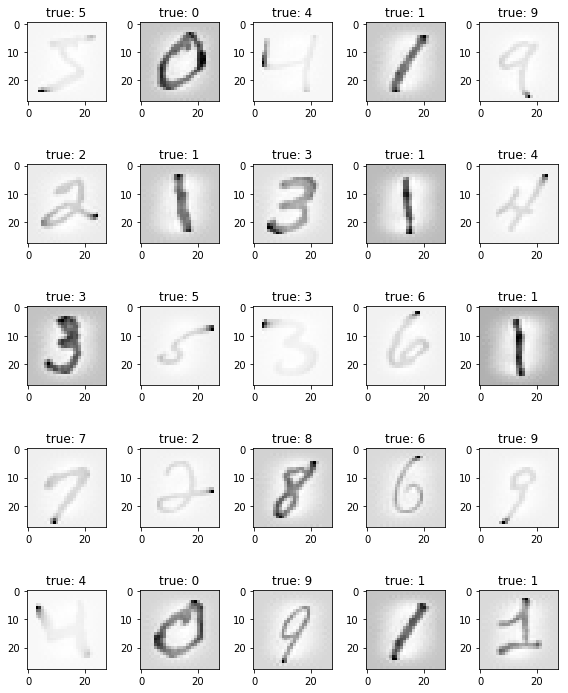

In [63]:
fig, _ = plt.subplots(5, 5, figsize = (8, 10))

for i, ax in enumerate(fig.axes):
    X = pca.inverse_transform(X_train_pca[i]).reshape(28, 28)
    label = df_train.iloc[i, 0]
    ax.imshow(X, cmap="Greys")
    ax.set_title("true: " + str(label))
    
plt.tight_layout()

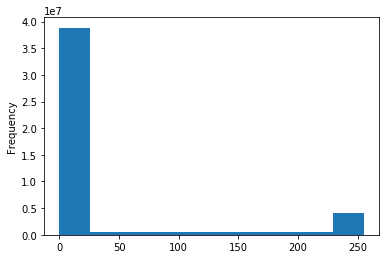

In [66]:
pd.Series(df_train.iloc[:, 1:].values.flatten()).plot.hist()